# Regresión lineal

## Mínimos cuadrados

In [20]:
import numpy as np
from numpy.linalg import inv 
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

### 1. Tabla de mínimos cuadrados

In [21]:
x = [200, 220, 400, 330, 210, 390, 280, 140, 280, 290, 380]
y = [9, 6, 12, 7, 5, 10, 8, 4, 7, 10, 14]
X = sm.add_constant(x)

In [22]:
xy = []
xx = []
for i in range(len(x)):
  xy.append(x[i]*y[i])
  xx.append(x[i]*x[i])

In [23]:
ls_table = [[x], [y], [xy], [xx]]
ls_table

[[[200, 220, 400, 330, 210, 390, 280, 140, 280, 290, 380]],
 [[9, 6, 12, 7, 5, 10, 8, 4, 7, 10, 14]],
 [[1800, 1320, 4800, 2310, 1050, 3900, 2240, 560, 1960, 2900, 5320]],
 [[40000,
   48400,
   160000,
   108900,
   44100,
   152100,
   78400,
   19600,
   78400,
   84100,
   144400]]]

In [24]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/Users/nasa_penguin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     16.10
Date:                Fri, 18 Feb 2022   Prob (F-statistic):            0.00305
Time:                        15:30:37   Log-Likelihood:                -21.561
No. Observations:                  11   AIC:                             47.12
Df Residuals:                       9   BIC:                             47.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3881      2.069      0.188      0.855      -4.291       5.068
x1             0.0281      0.007      4.012      0.003       0.012       0.044
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.744
Skew:                           0.520   Prob(JB):                        0.689
Kurtosis:                       2.265   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Coeficiente de Pearson

In [25]:
pearson = np.corrcoef(x, y)[0][1]
pearson

0.8008901961979922

### 3. Coeficiente de determinación

In [26]:
coef = results.params[1]
coef

0.02811881188118812

### 4. Pendiente de la tangente

In [27]:
def slope(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1)
    return x

In [28]:
slope(x[0], y[0], x[2], y[2])

0.015

### 5. Ordenada al origen

In [29]:
intercept = results.params[0]
intercept

0.3881188118811869

### 6. Establece la recta de regresión

In [30]:
ec = f"y = {coef} x + {intercept}"
ec

'y = 0.02811881188118812 x + 0.3881188118811869'

### 7. Dibuja la gráfica de dispersión

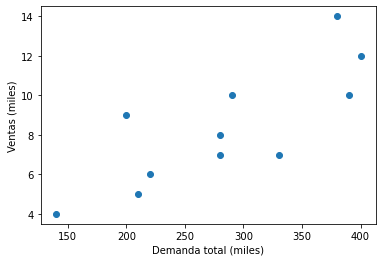

In [50]:
plt.scatter(x, y); plt.xlabel('Demanda total (miles)'); plt.ylabel('Ventas (miles)');

### 8. Línea de tendencia

In [32]:
y_pred = results.predict(X)

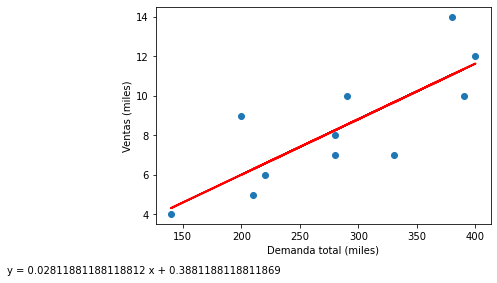

In [51]:
plt.scatter(x, y); plt.xlabel('Demanda total (miles)'); plt.ylabel('Ventas (miles)');
plt.plot(x, y_pred, c='red', linewidth=2)
plt.text(0,1,ec)
plt.show()

### 9. Conclusión

Existe una relación lineal fuerte entre la demanda total y las ventas, sin embargo existen pequeñas variaciones, el modelo tiene una efectividad del 60% aproximadamente (ya que es el valor de r cuadrada).